**Group Members**

1. Panu Panuparb

2. Panapat Prasanboonlert

3. Tanakan Wongleelaseth

# **Load Dependencies**

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266 kB 8.0 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 
     |████████████████████████████████| 261 kB 60.4 MB/s 
     |████████████████████████████████| 111 kB 71.1 MB/s 
     |████████████████████████████████| 271 kB 51.8 MB/s 
     |████████████████████████████████| 1.3 MB 40.1 MB/s 
     |████████████████████████████████| 80 kB 11.5 MB/s 
     |████████████████████████████████| 1.7 MB 40.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 72.0 MB/s 
     |████████████████████████████████| 6.8 MB 16.7 MB/s 
     |████████████████████████████████| 2.0 MB 68.2 MB/s 
     |████████████████████████████████| 14.6 MB 127 kB/s 
     |████████████████████████████████| 10.1 MB 28.4 MB/s 
     |████████████████████████████████| 102 kB 12.8 MB/s 
     |████████████████

In [ ]:
import pandas as pd
from pycaret.clustering import *

# **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('SupermarketData.csv')

In [ ]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [ ]:
df.tail(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
575698,200706,2007-04-02,2,18,1,1.11,PRD0904977,CL00074,DEP00021,G00007,D00002,CUST0000868779,LA,YF,994105200717218,L,MM,Top Up,Fresh,STORE00001,LS,E02
575699,200813,2008-05-23,6,12,1,1.11,PRD0904977,CL00074,DEP00021,G00007,D00002,CUST0000325292,UM,OT,994111100378925,L,MM,Top Up,Fresh,STORE00001,LS,E02
575700,200744,2007-12-25,3,13,3,3.33,PRD0904977,CL00074,DEP00021,G00007,D00002,CUST0000448280,UM,OT,994109000331647,L,MM,Full Shop,Mixed,STORE00001,LS,E02
575701,200625,2006-08-16,4,14,1,1.11,PRD0904977,CL00074,DEP00021,G00007,D00002,CUST0000263489,LA,YA,994101900332714,L,MM,Full Shop,Mixed,STORE00001,LS,E02
575702,200720,2007-07-13,6,12,1,1.11,PRD0904977,CL00074,DEP00021,G00007,D00002,CUST0000325292,UM,OT,994106600387402,L,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info

<bound method DataFrame.info of         SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
0          200732 2007-10-05             6         17         3   6.75   
1          200733 2007-10-10             4         20         3   6.75   
2          200741 2007-12-09             1         11         1   2.25   
3          200731 2007-09-29             7         17         1   2.25   
4          200737 2007-11-10             7         14         3   6.75   
...           ...        ...           ...        ...       ...    ...   
575698     200706 2007-04-02             2         18         1   1.11   
575699     200813 2008-05-23             6         12         1   1.11   
575700     200744 2007-12-25             3         13         3   3.33   
575701     200625 2006-08-16             4         14         1   1.11   
575702     200720 2007-07-13             6         12         1   1.11   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
0    

# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs


# Calculate features

In [ ]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max')
                                                                                  ).reset_index()

In [ ]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [ ]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [ ]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [ ]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [ ]:
df_csv.head(5)

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,TicketSize,total_days,recency
0,CUST0000000181,2.44,1,1,2007-01-06,2007-01-06,2.440000,1,547
1,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,20.535625,338,13
2,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,1.983333,65,730
3,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,9.935000,610,14
4,CUST0000001194,2455.27,103,399,2006-04-22,2008-06-20,23.837573,791,16


# **Cluster customers**

In [ ]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate'], normalize=True)

,Description,Value
0,session_id,482
1,Original Data,"(3438, 9)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(3438, 6)"
9,CPU Jobs,-1


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7fefbce3b7a0>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7fefbce...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7fefbce3bb00>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7fefbce19830>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7fefbce195f0>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7fefbce198c0>,make_scorer(completeness_score),pred,{},True,True,False


# Compare model performance

In [ ]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.163,61.5716,6.3879,0,0,0


In [ ]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
sc,0.772700,108.164700,0.511100,0,0,0
birch,0.448300,791.722400,0.850000,0,0,0
kmeans,0.425000,2158.724300,0.908400,0,0,0
hclust,0.393000,2004.255500,0.970400,0,0,0
dbscan,0.251200,201.407900,1.629100,0,0,0
ap,0.000000,0.000000,0.000000,0,0,0
kmodes,-0.163000,61.571600,6.387900,0,0,0


# Spectral Clustering Clustering

In [ ]:
sc = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7727,108.1647,0.5111,0,0,0


In [ ]:
plot_model(sc)

# KMeans Clustering

In [ ]:
kmeans = create_model('kmeans') 

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.425,2158.7243,0.9084,0,0,0


In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=482, tol=0.0001, verbose=0)


In [ ]:
plot_model(kmeans)

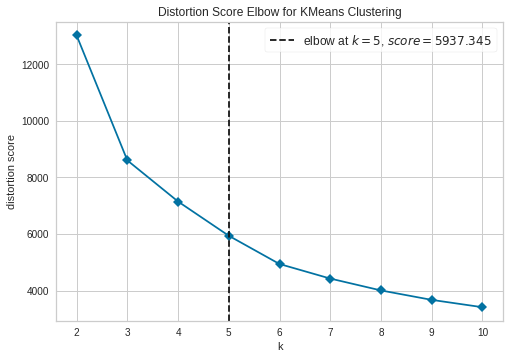

In [ ]:
plot_model(kmeans, plot = 'elbow')

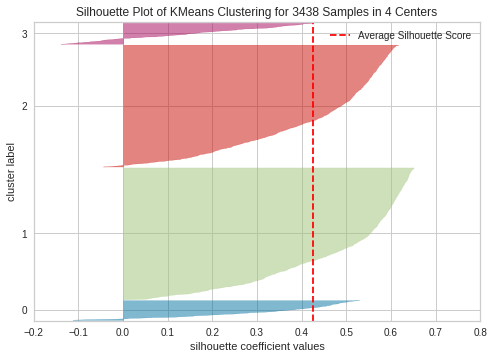

In [ ]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

### **Feature Importance**


In [ ]:
new = df_csv._get_numeric_data().dropna(axis=1)
kmeans.fit(new)
predict = kmeans.predict(new)

In [ ]:
df_csv['Cluster'] = pd.Series(predict, index=df_csv.index)

In [ ]:
df_csv.head(25)

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,TicketSize,total_days,recency,Cluster
0,CUST0000000181,2.44,1,1,2007-01-06,2007-01-06,2.440000,1,547,1
1,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,20.535625,338,13,0
2,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,1.983333,65,730,1
3,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,9.935000,610,14,0
4,CUST0000001194,2455.27,103,399,2006-04-22,2008-06-20,23.837573,791,16,2
5,CUST0000002257,1.99,1,1,2006-07-21,2006-07-21,1.990000,1,716,1
6,CUST0000002605,1.80,6,1,2006-10-08,2008-06-12,0.300000,614,24,0
7,CUST0000002637,124.63,15,53,2006-08-03,2008-05-30,8.308667,667,37,0
8,CUST0000002638,15.59,1,4,2007-04-14,2007-04-14,15.590000,1,449,1
9,CUST0000002813,144.27,12,72,2007-07-31,2008-04-12,12.022500,257,85,0


In [ ]:
df_csv.dtypes

CUST_CODE              object
TotalSpend            float64
TotalVisits             int64
TotalSKUs               int64
FirstDate      datetime64[ns]
LastDate       datetime64[ns]
TicketSize            float64
total_days              int64
recency                 int64
Cluster                 int32
dtype: object

In [ ]:
X = df_csv[['TotalSpend', 'TotalVisits', 'TotalSKUs', 'TicketSize', 'total_days', 'recency']]
y = df_csv['Cluster']

In [ ]:
X.head()

,TotalSpend,TotalVisits,TotalSKUs,TicketSize,total_days,recency
0,2.44,1,1,2.440000,1,547
1,328.57,16,116,20.535625,338,13
2,5.95,3,4,1.983333,65,730
3,39.74,4,24,9.935000,610,14
4,2455.27,103,399,23.837573,791,16


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    2
Name: Cluster, dtype: int32

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(248.62, 282.37, 'X[4] <= 281.5\ngini = 0.574\nsamples = 3438\nvalue = [1418, 1724, 230, 66]'),
 Text(121.52, 249.15000000000003, 'X[5] <= 62.5\ngini = 0.057\nsamples = 1690\nvalue = [49, 1640, 1, 0]'),
 Text(54.56, 215.93, 'X[4] <= 211.5\ngini = 0.512\nsamples = 76\nvalue = [36, 39, 1, 0]'),
 Text(19.84, 182.71000000000004, 'X[0] <= 174.46\ngini = 0.18\nsamples = 40\nvalue = [4, 36, 0, 0]'),
 Text(9.92, 149.49, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0, 0]'),
 Text(29.759999999999998, 149.49, 'X[2] <= 31.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1, 0, 0]'),
 Text(19.84, 116.27000000000004, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(39.68, 116.27000000000004, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0]'),
 Text(89.28, 182.71000000000004, 'X[3] <= 1.645\ngini = 0.202\nsamples = 36\nvalue = [32, 3, 1, 0]'),
 Text(69.44, 149.49, 'X[5] <= 28.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0, 0]'),
 Text(59.519999999999996, 116.27000000000004, 'gini = 0.0\nsamples = 1\nv

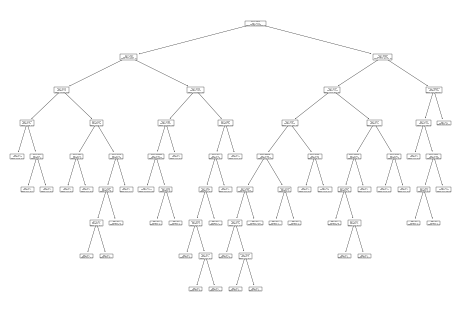

In [ ]:
tree.plot_tree(clf)

In [ ]:
import numpy as np
feature_importances_decisiontrees = pd.DataFrame(np.array([clf.feature_importances_]),
                   columns=['TotalSpend', 'TotalVisits', 'TotalSKUs', 'TicketSize', 'total_days', 'recency'])
print(feature_importances_decisiontrees)

   TotalSpend  TotalVisits  TotalSKUs  TicketSize  total_days   recency
0    0.245273     0.002714   0.004511     0.00289    0.665612  0.079001


In [ ]:
df_csv_cluster = df_csv[['CUST_CODE','Cluster','TotalSpend']]

In [ ]:
df_csv_cluster

,CUST_CODE,Cluster,TotalSpend
0,CUST0000000181,1,2.44
1,CUST0000000689,0,328.57
2,CUST0000000998,1,5.95
3,CUST0000001163,0,39.74
4,CUST0000001194,2,2455.27
...,...,...,...
3433,CUST0000999439,0,43.60
3434,CUST0000999544,1,6.32
3435,CUST0000999593,0,451.06
3436,CUST0000999935,0,444.17


In [ ]:
df_join = pd.merge(df, df_csv_cluster, on ='CUST_CODE', how ='left')

In [ ]:
df_join.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,Cluster,TotalSpend
0,200732,2007-10-05,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02,0.0,529.38
1,200733,2007-10-10,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02,2.0,1802.64
2,200741,2007-12-09,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02,3.0,3581.65
3,200731,2007-09-29,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02,3.0,4856.10
4,200737,2007-11-10,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02,NaN,NaN


In [ ]:
df_TotalSpend = df_join.groupby(['Cluster','CUST_LIFESTAGE','PROD_CODE'])['TotalSpend'].sum().loc[lambda x: x>1000000]

In [ ]:
df_TotalSpend

Cluster  CUST_LIFESTAGE  PROD_CODE 
2.0      OA              PRD0903052    2544048.12
                         PRD0903678    1956856.89
                         PRD0904358    1225939.54
         OT              PRD0903052    2067554.36
                         PRD0903678    1543898.23
                         PRD0904358    1304288.57
         YA              PRD0904358    1067562.71
         YF              PRD0903052    1898066.34
                         PRD0903678    1003560.54
                         PRD0904358    1225262.10
3.0      OA              PRD0900121    2019305.01
                         PRD0900345    1235507.82
                         PRD0901265    1009467.46
                         PRD0903052    1956972.74
                         PRD0903074    1857302.49
                         PRD0903678    1987232.39
         OF              PRD0904358    1183464.08
         OT              PRD0900121    2772163.67
                         PRD0900830    1186571.88
              

In [ ]:
df_TotalSpend.filter(like='0.0', axis=0)

Series([], Name: TotalSpend, dtype: float64)

In [ ]:
df_TotalSpend.filter(like='1.0', axis=0)

Series([], Name: TotalSpend, dtype: float64)

In [ ]:
df_TotalSpend.filter(like='2.0', axis=0)

Cluster  CUST_LIFESTAGE  PROD_CODE 
2.0      OA              PRD0903052    2544048.12
                         PRD0903678    1956856.89
                         PRD0904358    1225939.54
         OT              PRD0903052    2067554.36
                         PRD0903678    1543898.23
                         PRD0904358    1304288.57
         YA              PRD0904358    1067562.71
         YF              PRD0903052    1898066.34
                         PRD0903678    1003560.54
                         PRD0904358    1225262.10
Name: TotalSpend, dtype: float64

In [ ]:
df_TotalSpend.filter(like='3.0', axis=0)

Cluster  CUST_LIFESTAGE  PROD_CODE 
3.0      OA              PRD0900121    2019305.01
                         PRD0900345    1235507.82
                         PRD0901265    1009467.46
                         PRD0903052    1956972.74
                         PRD0903074    1857302.49
                         PRD0903678    1987232.39
         OF              PRD0904358    1183464.08
         OT              PRD0900121    2772163.67
                         PRD0900830    1186571.88
                         PRD0903052    4084288.04
                         PRD0903074    1167006.66
                         PRD0903637    1093666.24
                         PRD0903678    2882785.15
                         PRD0904358    2320209.40
         YA              PRD0903052    1929674.68
                         PRD0904358    2293239.08
         YF              PRD0900121    1568351.69
                         PRD0901265    1624627.23
                         PRD0903052    2399334.04
              

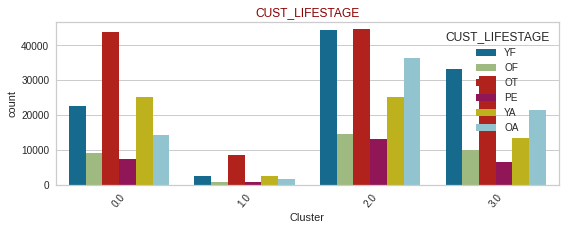

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,3))
sns.countplot(df_join["Cluster"], hue = "CUST_LIFESTAGE", data = df_join)
plt.xticks(rotation = 50)
plt.title("CUST_LIFESTAGE", color = "darkred")
plt.show()

# **Interpret results and plan for actions**

1. Define features โดย Calculate Feature ได้แก่ TotalSpend, TotalVisits, TotalSKUs,	FirstDate,	LastDate,	TicketSize,	total_days, recency ก่อนทำสร้าง Model
2. ทำการ fit model K-mean ได้คอลัมน์ที่บ่งบอกถึงการแบ่งกลุ่ม Cluster 0,1,2,3
3. ทำ Feature Importance โดย DecisionTreeClassifier เพื่อหาความสำคัญของ Feature แต่ละตัว
4. plan for action โดยดูแต่ละ Cluster แบ่งลูกค้าใน Cluster ตาม CUST_LIFESTAGE, PROD_CODE ตามลำดับ เพื่อจัดอันดับสินค้าที่มีการซื้อสูงที่สุด TotalSpend > 1,000,000 Bahts
5. ทำการ Product Recommendation สินค้านั้นๆ ให้แต่ละกลุ่ม Lifestage เพื่อให้ตรงกับความต้องการมากที่สุด ผ่าน Social Media โดยอาจแจกคูปองส่วนลด, ของแถม เป็นต้น